# Automatic Differentiation with Jax

In previous notebooks, you gained familiarity with symbolic manipulations using SymPy, for example, taking derivatives. You could use SymPy to take a derivative and evaluate it, though this is not generally practical in machine learning. Automatic differentiation (AD) is. Many packages have automatic differentiation capabilities, including PyTorch and TensorFlow. I prefer [JAX](https://github.com/jax-ml/jax); hence, it is what we will use in this course.

[JAX](https://github.com/jax-ml/jax) is a high-performance library for numerical computing that enables automatic differentiation, making it useful for machine learning, scientific computing, and optimization tasks.

In this notebook we will learn how to calculate gradients, Jacobians, and Hessians using JAX. These derivative operators are used in numerical optimization. Most neural networks use gradient-based numerical optimization methods to solve for the network parameters. Understanding how derivatives work and how to calculate them is necessary to have a deep understanding of how many machine learning methods work.

## Automatic Differentiation

Automatic differentiation is a technique that computes partial derivatives using the chain rule. Unlike numerical differentiation (finite difference methods), which can suffer from precision issues (round-off error and truncation error), or symbolic differentiation (which can be computationally expensive), AD provides a balance of accuracy and performance.

In this notebook we will use the following automatic derivative methods:

1. `jax.grad()` – Computes gradients of scalar-valued functions
2. `jax.jacobian()` – Computes Jacobians (partial derivatives of vector-valued functions)
3. `jax.hessian()` – Computes second-order derivatives

**JAX NumPy versus NumPy**

JAX provides an alternative to NumPy that is optimized for automatic differentiation and accelerated computations (GPU/TPU support) while maintaining a familiar NumPy-like API.

We will use `jnp` for `jax.numpy`, as shown in the code below.

**Two things to keep in mind:**
- JAX arrays are immutable
- JAX derivatives use floats

This notebook follows a **learn by example** approach. You might find it useful to code along with the examples on your own.


In [1]:
import jax
import jax.numpy as jnp
from jax import grad, jacobian, hessian, jacfwd, jacrev
from jax import vmap, jit

import timeit

%matplotlib inline 
import matplotlib.pyplot as plt

## Derivative with Jax grad function
Use Jax grad function to take the derivative of 
$$f(x) = x^2$$. 

An example code. 
```python 
def func(x): 
    return x**2

dfunc = grad(func) 
```
Note that for the Jax grad function: 
* the argument must be a float
* it only works for scalar inputs, not arrays


In [2]:
def func(x):
    return x**2

# derivative of the above function 
dfunc=grad(func)

In [3]:
# test output 
dfunc(3.0)

Array(6., dtype=float32, weak_type=True)

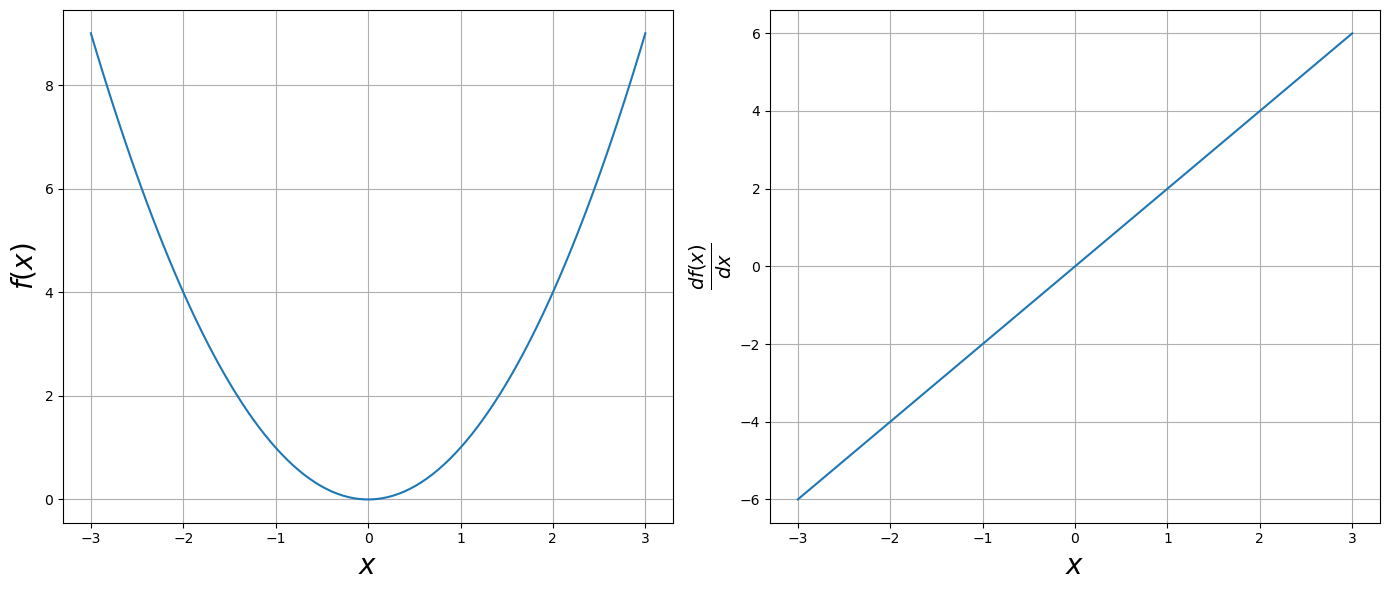

In [4]:
x=jnp.linspace(-3,3, 100) 

fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(121)
ax.set_xlabel(r"$x$", size=20)
ax.set_ylabel(r"$f(x)$", size=20)

ax.plot(x, func(x))
ax.grid()

df_array=jnp.array([dfunc(val) for val in x]) 

ax=fig.add_subplot(122)
ax.set_xlabel(r"$x$", size=20)
ax.set_ylabel(r"$\frac{df(x)}{dx}$", size=20)
ax.plot(x, df_array) 
ax.grid()
plt.tight_layout()

**Suggested Problem**
Use the Jax grad function to code you own example, in the same manner as above. Be sure you have a plot too. 

## Faster with JAX JIT (`jax.jit`) and JAX VMAP (`jax.vmap`) 

JAX can be sped up by using Just-In-Time (JIT) compilation and vectorized mapping (VMAP).

**Example: Using `jax.jit`**
```python
import jax
import jax.numpy as jnp

# Define a function
def slow_fn(x):
    return jnp.sin(x) + jnp.cos(x) * x**2

# Compile it with jit
fast_fn = jax.jit(slow_fn)

# Run it
x = jnp.array([3.0])
print(fast_fn(x))  # Faster execution
```

Note that the first call is slow due to compilation, but later calls are faster once the function is precompiled.   

Vectorized mapping allows you to vectorize operations, similar to how NumPy vectorization works. This eliminates slow Python loops. 

**Example: combining `jit` and `vmap`**

For maximum performance, you can **combine `jit` and `vmap`**:
```python
fast_vectorized_fn = jax.jit(jax.vmap(slow_fn))
print(fast_vectorized_fn(x))  # Runs very fast
```

**Below is an example of using `jit` and `vmap`, applied to our first example of `grad`.** I used `timeit` to compare execution times.

In [7]:
def list_comprehension(x): 
    return jnp.array([dfunc(val) for val in x]) 
    

df_vec=vmap(dfunc)

fx_vec=jit(vmap(dfunc))


In [8]:
timeit.timeit(lambda :list_comprehension(x), number=10)

0.025271082995459437

In [9]:
timeit.timeit(lambda: df_vec(x), number=10) 

0.05855287506710738

In [10]:
# run this twice to make sure it is compiled 
timeit.timeit(lambda: fx_vec(x), number=10) 

0.019055249984376132

## Gradient with grad function 
The gradient is 

\begin{equation} 
\nabla f(x_1, x_2, ...., x_N) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_N}
\end{bmatrix} 
\end{equation} 

**Example** 
Let us try a two dimensional case, $f(x,y) = x^2 + 3y^3$. 
The gradient is $ \nabla f = 2x + 9y^2$. 

```python
def func(x): 
    return x**2 + 2*y**3

df = grad(func) 
``` 

In [11]:
def func(x):
    return x[0]**2 + 3*x[1]**3

df = grad(func) 

In [12]:
x = jnp.array([1.,2.]) 
func([1,2]) 

25

In [13]:
df(x) 

Array([ 2., 36.], dtype=float32)

**Example**
Use the jax grad function to take the gradient of 
\begin{equation} 
\begin{split} 
& f(x,y,z)= x^2 + xy^3 + \sin(z) \\
& \nabla f = \begin{bmatrix} 2x + y^3 \\ 3xy^2 \\ \cos(z) \end{bmatrix} 
\end{split} 
\end{equation} 

In [14]:
def func(x): 

    x, y, z = x
    

    return x**2 + x*y**3 + jnp.sin(z)

dfunc=grad(func) 

In [15]:
x=jnp.array([2,2,jnp.pi]) 
func(x) 

Array(20., dtype=float32)

In [16]:
dfunc(x) 

Array([12., 24., -1.], dtype=float32)

## Jacobian 
For a function $f : \mathbb{R}^n \to \mathbb{R}^m$, the Jacobian is defined as
\begin{equation} 
J_f =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}.
\end{equation}

The elements in index notation for the Jacobian are
\begin{equation} 
[J_f]_{ij} = \frac{\partial f_i}{\partial x_j}.
\end{equation} 


**Example** 
Consider the vector valued function 
\begin{equation} 
\mathbf{f}(x,y) = \begin{bmatrix} x^2 + y^2 \\ x^2 + xy \end{bmatrix} .
\end{equation} 

The Jacobian is 
\begin{equation} 
J_f = \begin{bmatrix} 2x & 2y \\
2x + y & x 
\end{bmatrix} 
\end{equation} 

In [17]:
def f(x):
    x, y = x
    return jnp.array([x**2 + y**2 , x**2 + x*y]) 

def df(x): 
    x, y = x
    return jnp.array([[2*x, 2*y], [2*x + y, x]]) 

J = jacobian(f) 
x=jnp.array([2., 3.]) 

print("function evaluation", f(x))
print("coded Jacobian", df(x))
print("AD Jacobian", J(x))

function evaluation [13. 10.]
coded Jacobian [[4. 6.]
 [7. 2.]]
AD Jacobian [[4. 6.]
 [7. 2.]]


**Example**
Using Jax code the Jacobian for 
\begin{equation} 
f(x, y) =
\begin{bmatrix}
x^2 + y \\
\sin(x) + y^2
\end{bmatrix}, 
\end{equation} 

\begin{equation} 
J_f(x, y) =
\begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
\end{equation} 


## Hessian 
The **Hessian matrix** is a square matrix of second-order partial derivatives of a scalar function. Given a twice-differentiable function $( f: \mathbb{R}^n \to \mathbb{R} )$, the Hessian matrix $H$ is defined as:


\begin{equation}
H_f=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
\end{equation} 

\begin{equation} 
[H_f]_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}
\end{equation} 

**Example**
\begin{equation} 
f(x, y) = x^3 + y^2 + xy
\end{equation} 

Computing second-order derivatives:

\begin{equation} 
\frac{\partial^2 f}{\partial x^2} = \frac{\partial}{\partial x} (3x^2 + y) = 6x
\end{equation} 

\begin{equation} 
\frac{\partial^2 f}{\partial y^2} = \frac{\partial}{\partial y} (2y + x) = 2
\end{equation} 

\begin{equation} 
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial}{\partial y} (3x^2 + y) = 1
\end{equation} 

\begin{equation} 
\frac{\partial^2 f}{\partial y \partial x} = \frac{\partial}{\partial x} (2y + x) = 1
\end{equation} 

\begin{equation} 
H_f= \begin{bmatrix} 6x & 1 \\
1 & 2 \end{bmatrix} 
\end{equation} 


In [18]:
def f(x): 
    x,y=x 

    return x**3 + y**2 + x*y

def ddf(x): 
    x,y=x 
    return jnp.array([[6*x, 1],[1, 2]]) 

H=hessian(f) 

In [19]:
x=jnp.array([3.,2.]) 
print("function evaluation", f(x))
print("coded Hessian", ddf(x))
print("AD Hessian", H(x))

function evaluation 37.0
coded Hessian [[18.  1.]
 [ 1.  2.]]
AD Hessian [[18.  1.]
 [ 1.  2.]]


**Suggested Problem**
Code your own example of using Jax hessian, in the same manner as the above example. 